# Séparation aveugle de sources

## Introduction

## Question 1

Deux variables $X_1$ et $X_2$ sont indépendantes si et seulement si:

$P(X_1 \in A_1, X_2 \in A_2)= P(X_1 \in A_1) P(X_2 \in A_2)$

Deux variables $X_1$ et $X_2$ sont non corrélées si $cov(X_1,X_2)=0$.

## Analyse en composants indépendantes

## Question 2

On a $x=As$. En multipliant les deux côtés de cette égalité à gauche par la matrice $W$ on a:

$Wx=WAs$

Vu que $WA=I_N$, on arrive au résultat $Wx=s$.

## Question 3

Quand m<n, le nombre de composants à estimer est plus petit que le nombre de signaux dont on dispose pour faire cette estimation. Le problème d'estimation n'a donc pas de solution unique.

## Question 4

Calculons d'abord la moyenne des signaux $s_i$

$E[s_i]=\int_R xf_{s_i}(x)dx = \int_{-\sqrt{3}}^{\sqrt{3}}\frac{1}{2\sqrt{3}}xdx=0$

Les signaux étant centrés, leur variance est égale au moment d'ordre 2 : 

$E[s_i^2]=\int_R x^2f_{s_i}(x)dx = \int_{-\sqrt{3}}^{\sqrt{3}}\frac{1}{2\sqrt{3}}x^2dx=1$

On a donc vérifié que les signaux sont de variance unité.

## Question 5

Les variables $s_1$, $s_2$ étant indépendantes, la densité de probabilité jointe peut être calculée comme le produit des densités individuelles. C'est-à-dire : 

$f_{s_1, s_2}(x,y)=\frac{1}{12}; -\sqrt{3}<x<\sqrt{3}; -\sqrt{3}<y<\sqrt{3}$

In [2]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

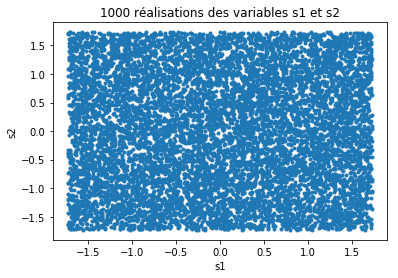

In [53]:
s1 = list()
s2 = list()
N_samples = 10000
for x in range(N_samples):
    s1.append((random.random()-0.5)*2*math.sqrt(3))
    s2.append((random.random()-0.5)*2*math.sqrt(3))
    
    
plt.plot(s1,s2,'.')
plt.title('1000 réalisations des variables s1 et s2')
plt.xlabel('s1')
plt.ylabel('s2')
plt.show()

On peut voir l'indépendance des variables facilement parce que en faissant des coups sur l'axis s1, on voit toujours la même distribution de s2 (sa distribution ne dépend pas de la valeur prise par s1). De plus, comme l'independence implique la décorrélation, on voit qu'il n'y a pas de tendances claires dans le plot (la distribution jointe des points est un carré).

## Question 6

In [54]:
A = np.array([[1 ,1],[-1, 2]])

In [55]:
x_1_list = list()
x_2_list = list()
for var1,var2 in zip(s1,s2):
    s = np.array([var1, var2])
    x = np.dot(A,s)
    x_1_list.append(x[0])
    x_2_list.append(x[1])


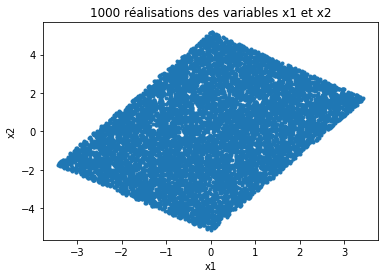

In [56]:
plt.plot(x_1_list,x_2_list,'.')
plt.title('1000 réalisations des variables x1 et x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

On voit clairement que les variables ne sont plus indépéndantes. Par exemple, si s1 = 3 la valeur de s2 est pratiquement déterminée.

## Question 7

On peut obtenir les coefficients de la matrice A directement de la réprésentation graphique. Les colonnes d'A sont les vecteurs propres de la transformation, c'est à dire, les diagonals des limits du carré. De la diagonal inférieure à gauche on obtient v1 = [2, -2] =  [1, -1] et de celle à droite on obtient v2 = [1, 2]. Par conséquence,  A = [v1, v2].

In [57]:
W = np.linalg.inv(A)
W

array([[ 0.66666667, -0.33333333],
       [ 0.33333333,  0.33333333]])

In [58]:
s_1__recovered = list()
s_2_recovered = list()

for var1,var2 in zip(x_1_list,x_2_list):
    x = np.array([var1, var2])
    s = np.dot(W,x)
    s_1__recovered.append(s[0])
    s_2_recovered.append(s[1])

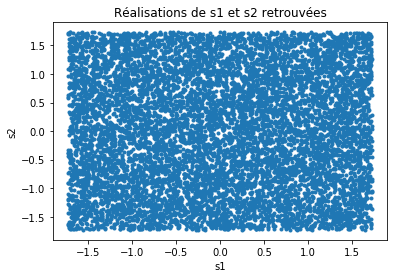

In [59]:
plt.plot(s_1__recovered,s_2_recovered,'.')
plt.title('Réalisations de s1 et s2 retrouvées')
plt.xlabel('s1')
plt.ylabel('s2')
plt.show()

Limitation : il faut d'abord que la matrice A soit inversible (c'est à dire, qu'il y ait le même nombre de capteurs que des sources). De plus, si le nombre de dimensions augmente, la technique n'est pas très pratique parce q'uil faut déterminer les coefficents visuellement.

## Question 8

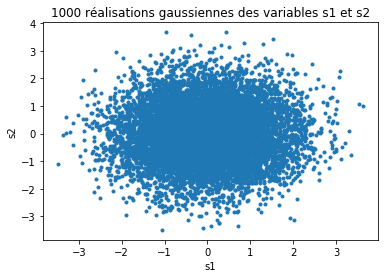

In [60]:
s1 = list()
s2 = list()
N_samples = 10000
for x in range(N_samples):
    s1.append(random.gauss(0,1))
    s2.append(random.gauss(0,1))
    
    
plt.plot(s1,s2,'.')
plt.title('1000 réalisations gaussiennes des variables s1 et s2')
plt.xlabel('s1')
plt.ylabel('s2')
plt.show()


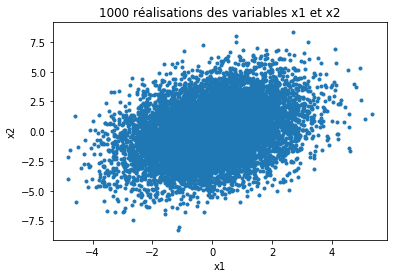

In [61]:
A = np.array([[1 ,1],[-1, 2]])

x_1_list = list()
x_2_list = list()
for var1,var2 in zip(s1,s2):
    s = np.array([var1, var2])
    x = np.dot(A,s)
    x_1_list.append(x[0])
    x_2_list.append(x[1])
    
plt.plot(x_1_list,x_2_list,'.')
plt.title('1000 réalisations des variables x1 et x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

On pourrait trouver les coefficients d'A avec les deux directions de variation maximal dans la nuage de points mais, cela commence à être de plus en plus compliqué.

## Question 9

La densité de probabilité de $s_1+s_2$ est le produit convolution des densités de probabilité de chacun des signaux; c'est à dire : 

$f_{s_1+s_2}(x)=f_{s_1}\star f_{s_2}(x)$

Chaque signal ayant une distribution uniforme entre $-\sqrt{3}$ et $\sqrt{3}$, la distribution de la somme a donc l'allure d'un "triangle" entre ces valeurs dont le pic se situe en $x=0$, et dont la surface est bien entendu égale à 1. En ajoutant une variable supplémentaire, on obtient la densité de la somme en convoluant ce résultat avec la densité de probabilité de cette variable aditionnelle. En ajoutant de plus en plus de variables uniformes et en convoluant leurs densités, on obtiendra une densité qui tend vers celle d'une gaussienne.

Vu que les variables sont uniformes, la densité de la somme peut être calculée en adaptant la loi de Irwin-Hall (celle-ci est donnée pour une variable uniforme entre 0 et 1). Dans le lien suivante https://fr.wikipedia.org/wiki/Loi_d%27Irwin-Hall on trouve la formule général pour une somme de $n$ gaussiennes ainsi que les cas particulières de $n$ = 1,2,3,4.

On peut constater que, en augmentant le nombre de variables, la densité de probabilité ressemble de plus en plus à celle d'une loi normale de moyenne et variance égales. Ceci est d'ailleurs cohérent avec la théorème de la limite centrale, d'après lequel la somme de N variables aléatoires indépendantes, peu importe leur loi, tend vers une gaussienne quand N tend vers l'infini. 

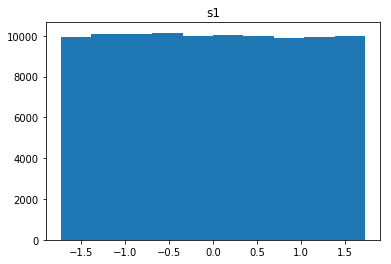

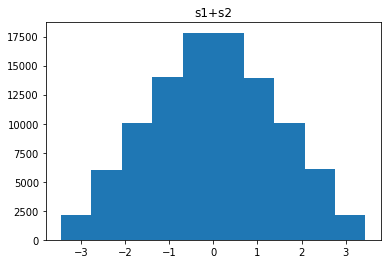

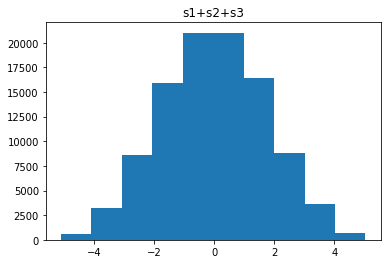

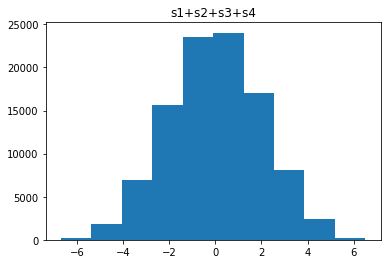

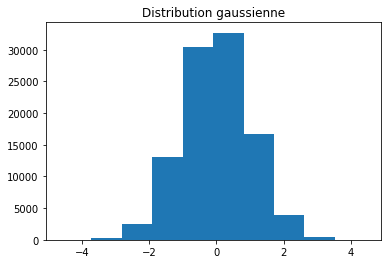

In [72]:
s1 = list()
s2 = list()
s3 = list()
s4 = list()
sgauss = list()

N_samples = 100000
for x in range(N_samples):
    s1.append((random.random()-0.5)*2*math.sqrt(3))
    s2.append((random.random()-0.5)*2*math.sqrt(3))
    s3.append((random.random()-0.5)*2*math.sqrt(3))
    s4.append((random.random()-0.5)*2*math.sqrt(3))
    sgauss.append(random.gauss(0,1))

sum1 = np.add(s1, s2)
sum2 = np.add(sum1, s3)
sum3 = np.add(sum2, s4)

plt.figure()
plt.title("s1")
plt.hist(s1)
plt.show()

plt.figure()
plt.title("s1+s2")
plt.hist(sum1)
plt.show()

plt.figure()
plt.title("s1+s2+s3")
plt.hist(sum2)
plt.show()

plt.figure()
plt.title("s1+s2+s3+s4")
plt.hist(sum3)
plt.show()

plt.figure()
plt.title("Distribution gaussienne")
plt.hist(sgauss)
plt.show()



On peut voir que en mesure qu'on ajoute des variables aleatoires indépendantes, la distribution devient celle d'une gaussienne.

# Question 10

La kurtosis d'une variable aleatoire est donnée par:

\begin{equation}
\label{kurtosis}
kurt(y) = E[y^4]-3E[y^2]^2
\end{equation}

Comme la variable est centrée, on a $E[y^2]=\sigma^2$.

Pour calculer $E[y^4]$, on utilise le theorème d'Isserly. 
Pour 4 variables gaussiennes (non nécessarement indépendantes), on a :

$E[y_1 y_2 y_3 y_4]=E[y_1 y_2]E[y_3 y_4] + E[y_1 y_3]E[y_2 y_4] + E[y_1 y_4] E[y_2 y_3]$.

Si on fixe $y_1 = y_2 = y_3 = y_4 = y$, on obtient $E[y^4]=3E[y^2]^2=3\sigma^2$

On voit donc que $kurt(y) = 3\sigma^2 - 3\sigma^2 = 0$


# Question 11

Comme $\tilde{x}=E \ D^{-1/2} \ E^T \ x$ on a :

$E[\tilde{x}\tilde{x}^T]=E[E \ D^{-1/2} \ E^T \ x x^T \ E \ D^{-1/2} \ E^T] = E \ D^{-1/2} \ E^T \ E[x x^T] \ E \ D^{-1/2} \ E^T$ (puisque $(D^{-1/2})^T = D^{-1/2}$ pour être une matrice diagonale). 

Mais $E[x x^T] = E \ D \ E^T $

$E[\tilde{x}\tilde{x}^T] = E \ D^{-1/2} \ E^T \ E \ D \ E^T \ E \ D^{-1/2} \ E^T$

Comme $E$ est une matrice orthogonal, $E \ E^T = E^T \ E = I_n$ 

$E[\tilde{x}\tilde{x}^T] = E \ D^{-1/2} \ D \ D^{-1/2} \ E^T$

et on a aussi que  $D^{-1/2} \ D \ D^{-1/2} = I_n$

$E[\tilde{x}\tilde{x}^T] = E \ E^T = I_n$

# Question 12

\begin{equation}
G(y) = log \ cosh\ y
\end{equation}

\begin{equation}
g(y) = \frac{senh \ y}{cosh \ y} = tan \ y
\end{equation}


\begin{equation}
g'(y) = sech \ ^2 \ y = \frac{1}{cosh \ ^2 \ y}
\end{equation}

# Question 13

In [200]:
x1 = np.fromfile('In_1.txt', dtype = np.float64)
x2 = np.fromfile('In_2.txt', dtype = np.float64)
y1 = np.fromfile('Ref_1.txt', dtype = np.float64)
y2 = np.fromfile('Ref_2.txt', dtype = np.float64)

x = np.stack([x1, x2],axis=0)

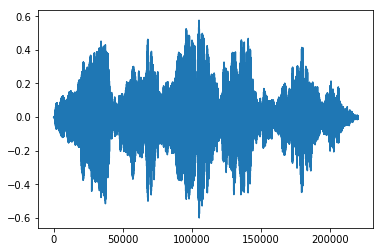

In [4]:
plt.plot(y1)
plt.show()

## Blanchissement

In [74]:
lambdas, E = np.linalg.eig(np.cov(x))
D_sqrt = np.diag(np.sqrt(lambdas))
x_hat = np.linalg.multi_dot([E, np.linalg.inv(D_sqrt), np.transpose(E), x])

On voit que la matrice de covariance de x_hat est l'identité

In [75]:
print(np.cov(x_hat))

[[1.00000000e+00 1.94377017e-16]
 [1.94377017e-16 1.00000000e+00]]


In [76]:
w = np.random.random(2)
delta = 100
max_error = 0.0000000000000001

while delta>max_error:
    u = np.dot(np.transpose(w), x_hat)
    z = np.mean(np.multiply(x_hat, np.tile(np.tanh(u), (2,1))), axis=1)
    v = np.mean(1-np.tanh(u)**2)*w
    w_plus = (z-v)/np.linalg.norm(z-v)
    delta = 1-(np.dot(w, w_plus))**2
    w = w_plus
    
print(delta)
print("w : ", w_plus)

-0.7703862697483723
w :  [-0.58564022 -0.81057111]


On voit que le vecteur trouvé dépend du vecteur w initial. Comme le critère n'est pas convexe il y a plusieurs minimums et on trouvera celui le plus proche au vecteur w initial.

## Question 14

In [77]:
w_list = list()
max_error = 0.0000000000000000001

for i in range(len(x)):
    
    w = np.random.random(2)
    delta = 100

    while delta>max_error:
        u = np.dot(np.transpose(w), x_hat)
        z = np.mean(np.multiply(x_hat, np.tile(np.tanh(u), (2,1))), axis=1)
        v = np.mean(1-np.tanh(u)**2)*w
        w_plus = (z-v)/np.linalg.norm(z-v)
        
        w_plus = w_plus - sum([np.dot(np.transpose(w_plus),w)*w for w in w_list])
        w_plus /= np.linalg.norm(w_plus)
    
        delta = 1-(np.dot(w, w_plus))**2
        w = w_plus
        

     
    w_list.append(w_plus)
    

In [78]:
w_list

[array([0.5898206 , 0.80753431]), array([-0.80753431,  0.5898206 ])]

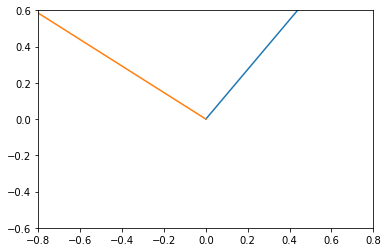

In [79]:
plt.plot([0,w_list[0][0]],[0,w_list[0][1]])
plt.plot([0,w_list[1][0]],[0,w_list[1][1]])
plt.xlim([-0.8,0.8])
plt.ylim([-0.6,0.6])
plt.show()

On peut facilement voir que les deux vecteurs sont orthogonaux. On construit l'estimation de W et on obtient l'estimation de x.

In [80]:
W_estime = np.row_stack(w_list)
s_estime = np.dot(W_estime,x_hat)

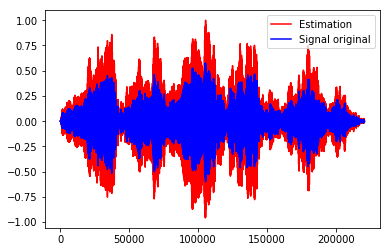

In [196]:
plt.plot(s_estime[0]/max(s_estime[0]), 'r')
plt.plot(y1, 'b')
plt.legend(['Estimation','Signal original'])
plt.show()

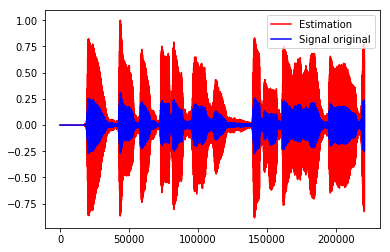

In [195]:
plt.plot(s_estime[1]/max(s_estime[1]), 'r')
plt.plot(y2, 'b')
plt.legend(['Estimation','Signal original'])
plt.show()

In [83]:
import sounddevice as sd

On écoute les signaux estimés et on les compare avec le signal melangé. On s'apperçoit qu'on peut mieux distinguer les signaux.

In [201]:
fs = 44100
sd.play(x1, fs)

In [104]:
fs = 44100
sd.play(s_estime[0]/max(s_estime[0]), fs)

In [183]:
fs = 44100
sd.play(s_estime[1]/max(s_estime[1]), fs)

In [52]:
source = y1
estimation = s_estime[0]
error = 1-(np.dot(source,estimation)/np.dot(np.linalg.norm(source),np.linalg.norm(estimation)))**2
error_db = 10*np.log10(error)
print("Erreur en db de la première estimation : ", error_db)

Erreur en db de la première estimation :  -57.15567573134795


In [51]:
source = y2
estimation = s_estime[1]
error = 1-(np.dot(source,estimation)/np.dot(np.linalg.norm(source),np.linalg.norm(estimation)))**2
error_db = 10*np.log10(error)
print("Erreur en db de la deuxième estimation : ", error_db)

Erreur en db de la deuxième estimation :  -57.15567573134795


On voit que les erreurs d'estimation en db sont faibles. Aussi, en écoutant les deux signaux, on voit qu'ils sont bien separés.

# Algorithme de séparation de sources basé sur les statistiques du second ordre

## Question 15

In [170]:
taille_fenetre = 10
nb_it = int(x.shape[1]/taille_fenetre)
R11 = np.zeros([taille_fenetre, taille_fenetre])
R12 = np.zeros([taille_fenetre, taille_fenetre])
R22 = np.zeros([taille_fenetre, taille_fenetre])

for i in range(nb_it):
    begin = i*taille_fenetre
    x1 = x[0,begin:begin+taille_fenetre]
    x2 = x[1,begin:begin+taille_fenetre]
    R11 += np.outer(x1,x1)
    R12 += np.outer(x1,x2)
    R22 += np.outer(x2,x2)
R11 /= nb_it
R12 /= nb_it
R22 /= nb_it

In [171]:
T1 = np.trace(R11)/taille_fenetre
T2 = np.trace(R22)/taille_fenetre
T12 = np.trace(R12)/taille_fenetre
F1 = (sum(sum(R11)) - np.trace(R11))/(taille_fenetre*(taille_fenetre-1))
F2 = (sum(sum(R22)) - np.trace(R22))/(taille_fenetre*(taille_fenetre-1))
F12 = (sum(sum(R12)) - np.trace(R12))/(taille_fenetre*(taille_fenetre-1))

In [172]:
σ = 0
α = 2*F12*T12 - (F1*(T2-σ**2) + F2*(T1 - σ**2))
β = 2*(T12**2-(T1-σ**2)*(T2-σ**2))
γ = np.sqrt((F1*(T2-σ**2)-F2*(T1-σ**2))**2+4*(F12*(T2-σ**2)-T12*F2)*(F12*(T1-σ**2)-T12*F1))
d1 = α - γ
d2 = α + γ

In [173]:
a11 = β*F1-(T1-σ**2)*d1
a12 = β*F12-T12*d2
a21 = β*F12-T12*d1
a22 = β*F2-(T2-σ**2)*d2
A_hat = [[a11, a12],[a21, a22]]

In [215]:
s_hat = np.dot(np.linalg.inv(A_hat)/np.max(np.linalg.inv(A_hat)),x)

On graphique les signaux originiaux et estimés dans le même graphe. On s'apperçoit qu'il y a juste un petite différence d'amplitude.

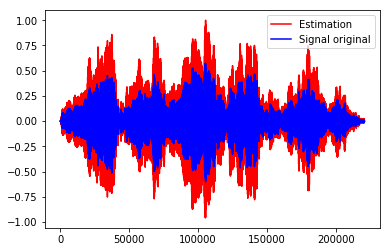

In [216]:
plt.plot(s_hat[0]/max(s_hat[0]),'r')
plt.plot(y1,'b')
plt.legend(['Estimation','Signal original'])
plt.show()

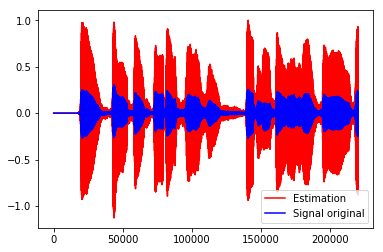

In [217]:
plt.plot(s_hat[1]/max(s_hat[1]),'r')
plt.plot(y2,'b')
plt.legend(['Estimation','Signal original'])
plt.show()

In [218]:
source = y1
estimation = s_hat[0]
error = 1-(np.dot(source,estimation)/np.dot(np.linalg.norm(source),np.linalg.norm(estimation)))**2
error_db = 10*np.log10(error)
print("Erreur en db dans le première signal : ", error_db)

Erreur en db dans le première signal :  -76.63165257677974


In [219]:
source = y2
estimation = s_hat[1]
error = 1-(np.dot(source,estimation)/np.dot(np.linalg.norm(source),np.linalg.norm(estimation)))**2
error_db = 10*np.log10(error)
print("Erreur en db dans le première signal  : ", error_db)

Erreur en db dans le première signal  :  -76.63165262118044


On écoute les deux signaux et on s'apperçoit que la qualité est supèrieure.

In [220]:
fs = 44100
sd.play(s_hat[0]/max(s_hat[0]), fs)

In [184]:
fs = 44100
sd.play(s_hat[1]/max(s_hat[1]), fs)